In [5]:

#TASK - 1.Give input image to model n it ahould predict it
#2.improve accuracy
#3.Accuracy val accuracy plots , Loss plots
#Experiment with depths
!pip install numpy

In [6]:
!pip install keras tensorflow


In [7]:
!pip install matplotlib

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [9]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [10]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [11]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [12]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

c:\Users\ashmi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0997 - loss: 2.6823 - val_accuracy: 0.0997 - val_loss: 2.3036
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0975 - loss: 2.3037 - val_accuracy: 0.0952 - val_loss: 2.3045
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0993 - loss: 2.3036 - val_accuracy: 0.1014 - val_loss: 2.3036
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0976 - loss: 2.3037 - val_accuracy: 0.0980 - val_loss: 2.3032
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0993 - loss: 2.3035 - val_accuracy: 0.0980 - val_loss: 2.3036
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0997 - loss: 2.3036 - val_accuracy: 0.0977 - val_loss: 2.3031
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1005 - loss: 2.3035 - val_accuracy: 0.0997 - val_loss: 2.3035
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0990 - loss: 2.3034 - val_accuracy: 0.

In [15]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.3035
test loss:2.3034725189208984
test accuracy:0.10000000149011612
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.09972500056028366, 0.09752500057220459, 0.09927500039339066, 0.09764999896287918, 0.09929999709129333, 0.09965000301599503, 0.10050000250339508, 0.09902500361204147, 0.0989999994635582, 0.09892500191926956], [2.682269811630249, 2.3037428855895996, 2.303565740585327, 2.3036575317382812, 2.303507089614868, 2.303622245788574, 2.303480386734009, 2.303400754928589, 2.303506851196289, 2.3036022186279297], [0.09969999641180038, 0.09520000219345093, 0.10140000283718109, 0.09799999743700027, 0.09799999743700027, 0.09769999980926514, 0.09969999641180038, 0.09520000219345093, 0.09520000219345093, 0.09520000219345093], [2.303579568862915, 2.3044588565826416, 2.303593397140503, 2.3032445907592773, 2.30364990234375, 2.3030967712402344, 2.303460121154785, 2.3038330078125, 2.303356170654297,

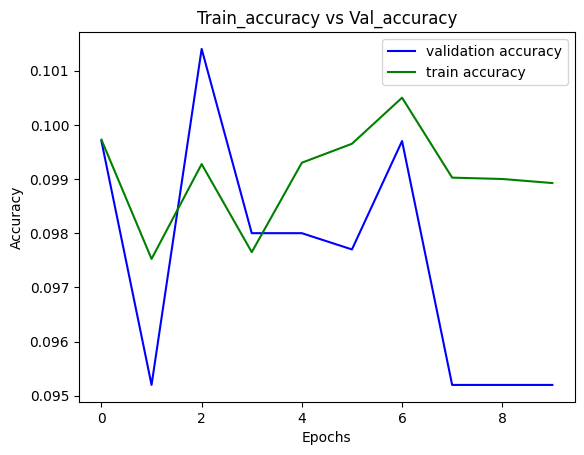

In [16]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

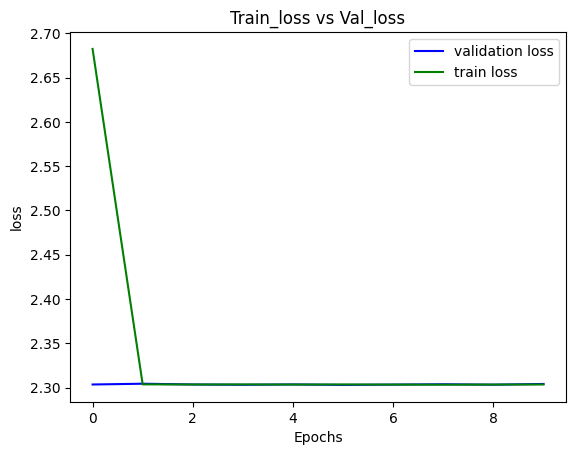

In [17]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [18]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [19]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0987 - loss: 2.6180 - val_accuracy: 0.1016 - val_loss: 2.3030
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1012 - loss: 2.3032 - val_accuracy: 0.0977 - val_loss: 2.3039
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0960 - loss: 2.3036 - val_accuracy: 0.1016 - val_loss: 2.3034
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0998 - loss: 2.3035 - val_accuracy: 0.0977 - val_loss: 2.3036
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1011 - loss: 2.3035 - val_accuracy: 0.0980 - val_loss: 2.3035
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0977 - loss: 2.3035 - val_accuracy: 0.1014 - val_loss: 2.3038
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0981 - loss: 2.3036 - val_accuracy: 0.1014 - val_loss: 2.3034
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1038 - loss: 2.3032 - val_accuracy: 0.

In [21]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 2.3034
test loss:2.303417682647705
test accuracy:0.10000000149011612


In [22]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1971 - loss: 2.2116 - val_accuracy: 0.2180 - val_loss: 2.0025
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2287 - loss: 2.0052 - val_accuracy: 0.2475 - val_loss: 2.0029
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2330 - loss: 1.9966 - val_accuracy: 0.2386 - val_loss: 1.9963
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2354 - loss: 1.9897 - val_accuracy: 0.2289 - val_loss: 1.9923
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2340 - loss: 1.9899 - val_accuracy: 0.2425 - val_loss: 1.9986
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2401 - loss: 1.9777 - val_accuracy: 0.2446 - val_loss: 1.9781
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2350 - loss: 1.9918 - val_accuracy: 0.2165 - val_loss: 2.0817
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2442 - loss: 1.9715 - val_accuracy: 0.

In [23]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2418 - loss: 1.9855
test loss:1.985541820526123
test accuracy:0.241799995303154


In [24]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2276 - loss: 2.0771 - val_accuracy: 0.2750 - val_loss: 1.9438
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2757 - loss: 1.9191 - val_accuracy: 0.2930 - val_loss: 1.9018
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2979 - loss: 1.8761 - val_accuracy: 0.2910 - val_loss: 1.8780
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3027 - loss: 1.8574 - val_accuracy: 0.3058 - val_loss: 1.8507
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3067 - loss: 1.8389 - val_accuracy: 0.3100 - val_loss: 1.8855
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3169 - loss: 1.8265 - val_accuracy: 0.3090 - val_loss: 1.8465
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3194 - loss: 1.8229 - val_accuracy: 0.3210 - val_loss: 1.8202
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3111 - loss: 1.8357 - val_accuracy: 0.

In [25]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3123 - loss: 1.8392
test loss:1.839195728302002
test accuracy:0.3122999966144562


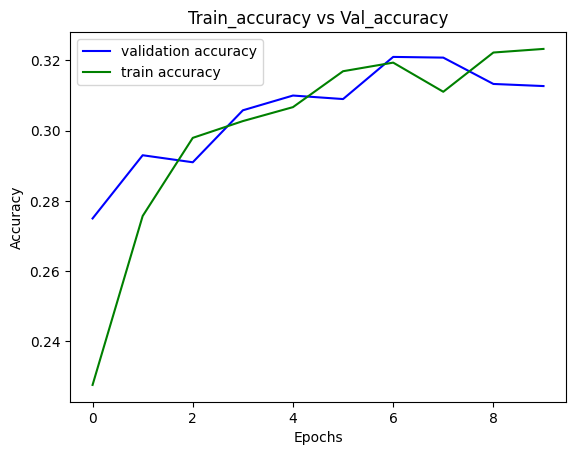

In [26]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
#SGD
#adam
#rmsprop

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(image_path, model):
    """
    Predict the class of an input image using the trained model
    
    Args:
        image_path: Path to the image file
        model: Trained Keras model
    
    Returns:
        Predicted class name and confidence
    """
    # Load and preprocess the image
    img = Image.open(image_path)
    
    # Resize to 32x32 (CIFAR-10 input size)
    img = img.resize((32, 32))
    
    # Convert to numpy array and normalize
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    
    # If image is grayscale, convert to RGB
    if len(img_array.shape) == 2:
        img_array = np.stack([img_array]*3, axis=-1)
    # If image has alpha channel, remove it
    elif img_array.shape[2] == 4:
        img_array = img_array[:, :, :3]
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class]} ({confidence:.2f})')
    plt.axis('off')
    plt.show()
    
    return class_names[predicted_class], confidence

# Example usage - you need to provide actual values:
# Replace 'path_to_your_image.jpg' with actual image path
# Replace 'model' with your trained model (model or model_3)

# For example, if you want to test with one of your trained models:
# predicted_class, confidence = predict_image('your_image.jpg', model_3)
# print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


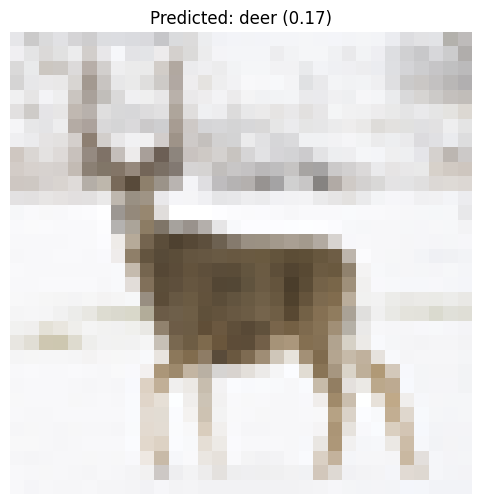

🎯 Predicted class: deer
📊 Confidence: 0.1712


In [31]:
image_path = "image.jpg"
predicted_class, confidence = predict_image(image_path, model_3)
print(f"🎯 Predicted class: {predicted_class}")
print(f"📊 Confidence: {confidence:.4f}")